In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import pathlib
from sklearn.model_selection import train_test_split

In [2]:
test = pd.read_csv("california_housing_test.csv")
train = pd.read_csv("california_housing_train.csv")

### Feature Engineering 

##### Utiliznig the Numeric Features of this dataset, not utilizing the geo spatial features to avoid overfitting

In [3]:
data = train[['total_rooms','total_bedrooms','population','households','median_income','housing_median_age']]
data_test = train['median_house_value']

##### Imputing the missing values of total rooms and total bedrooms with their modes to improve training fit

In [4]:
data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mode())
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mode())

C:\Users\John Zhang\AppData\Local\Temp\ipykernel_19164\2965851711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_rooms'] = data['total_rooms'].fillna(data['total_rooms'].mode())
C:\Users\John Zhang\AppData\Local\Temp\ipykernel_19164\2965851711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mode())


#### Data Visualization

##### Correlation map

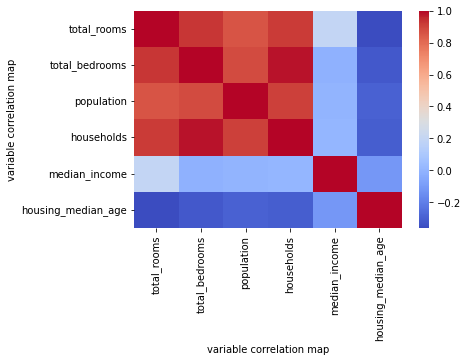

In [5]:
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.xlabel("variable correlation map")
plt.ylabel("variable correlation map")
plt.show()


##### Regression Income and Median Age Linear Representation

[Text(0.5, 1.0, 'Income to Value')]

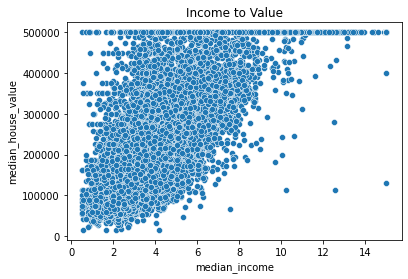

In [7]:
sns.scatterplot(data=train, x="median_income", y="median_house_value").set(title = 'Income to Value')

[Text(0.5, 1.0, 'housing_median_age to Value')]

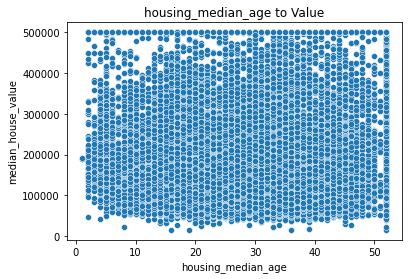

In [8]:
sns.scatterplot(data=train, x="housing_median_age", y="median_house_value").set(title = 'housing_median_age to Value')

#### Fitting the model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, data_test, test_size = 0.2, random_state = 0)


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

#### Prediction

In [40]:
y_actual = test['median_house_value']
y_test  = y_test[['total_rooms','total_bedrooms','population','households','median_income','housing_median_age']]

In [42]:
model_prediction = rfr.predict(y_test)

In [47]:
from sklearn.metrics import mean_absolute_error 
print('Mean Absolute Error:', mean_absolute_error(y_actual, model_prediction)) 

Mean Absolute Error: 48671.863143333336
